In [1]:
import glob
import subprocess
import os
import json
import pandas as pd

# Processing Tweets

In [4]:
dir_ = "C:/Users/jhtchns2/Box/ACE 592 SAE/Class_Examples/1_Text/"

First things first, clean up the text files.

### `sed` expressions
To clean these files, I am using two "sed" expressions that remove blank whitespace and make it a proper json file.
- `/^[[:space:]]*$/d` 
    - This one deletes lines that have only white space on them.
- `1s/^/[/;$!s/$/,/;$s/$/]/` 
    - This one puts a comma at the end of each line and brackets it with \[ and \]

In [5]:
for file in [dir_+"sorry_tweets.txt",dir_+"econ_tweets.txt"]:
    temp_file = open(dir_+"temp", "w")
    out_file = open(file.split("/")[-1].split(".")[0] + ".json", "a")
    sub = subprocess.call(['sed', '/^[[:space:]]*$/d',file], stdout=temp_file )
    sub = subprocess.call(['sed', '1s/^/[/;$!s/$/,/;$s/$/]/' , dir_+"temp"], stdout=out_file )

Now let's put them into one dictionary:

In [6]:
file_dict={}
for file in [dir_+"sorry_tweets.json",dir_+"econ_tweets.json"]:
    print(file)
    with open(file) as f:
        tweets = json.load(f)
    file_dict[file.split("/")[-1].split(".")[0]] = tweets

C:/Users/jhtchns2/Box/ACE 592 SAE/Class_Examples/1_Text/sorry_tweets.json
C:/Users/jhtchns2/Box/ACE 592 SAE/Class_Examples/1_Text/econ_tweets.json


Put them in dataframes:

In [10]:
df_S = pd.DataFrame()
df_S['timestamp'] = [x['created_at'] for x in file_dict['sorry_tweets']]

df_E = pd.DataFrame()
df_E['timestamp'] = [x['created_at'] for x in file_dict['econ_tweets']]

In [11]:
df_S['timestamp'][:5],df_S['timestamp'].iloc[-1]

(0    Tue Feb 15 23:53:22 +0000 2022
 1    Tue Feb 15 23:55:09 +0000 2022
 2    Tue Feb 15 23:58:11 +0000 2022
 3    Tue Feb 15 23:58:56 +0000 2022
 4    Tue Feb 15 23:59:08 +0000 2022
 Name: timestamp, dtype: object,
 'Thu Feb 17 14:43:09 +0000 2022')

The full text is sometimes stored in a different key, sometimes not.

How can we find the text in each of these two places in the tweet?

Simple way: an `if` statement which checks if a certain key is present.

For example, we can first check if a status is a retweet or not:

In [27]:
for tweet in file_dict['sorry_tweets'][:5]:
    if "retweeted_status" in list(tweet.keys()):
        print("RT")
    else:
        print("not RT")

RT
RT
not RT
not RT
not RT


Now let's go a layer deeper to figure out if the tweet is extended or not:

In [28]:
for tweet in file_dict['sorry_tweets'][:30]:
    if "retweeted_status" in list(tweet.keys()):
        if "extended_tweet" in list(tweet['retweeted_status'].keys()):
            print("RT and extended")
        else:
            print("RT and not extended")
    else:
        print("not RT")

RT and not extended
RT and not extended
not RT
not RT
not RT
not RT
not RT
not RT
not RT
not RT
not RT
not RT
not RT
RT and not extended
not RT
not RT
not RT
not RT
not RT
not RT
not RT
not RT
RT and extended
not RT
not RT
not RT
not RT
RT and extended
not RT
RT and extended


We are missing a vital case though. What about if it's not a retweet but it is extended?

In [29]:
for tweet in file_dict['sorry_tweets'][:40]:
    if "retweeted_status" in list(tweet.keys()):
        if "extended_tweet" in list(tweet['retweeted_status'].keys()):
            print("RT and extended")
        else:
            print("RT and not extended")
    elif "extended_tweet" in list(tweet.keys()):
        print("not RT, extended")
    else:
        print("not RT, not extended")

RT and not extended
RT and not extended
not RT, extended
not RT, not extended
not RT, not extended
not RT, not extended
not RT, extended
not RT, extended
not RT, not extended
not RT, not extended
not RT, not extended
not RT, not extended
not RT, not extended
RT and not extended
not RT, not extended
not RT, not extended
not RT, extended
not RT, extended
not RT, extended
not RT, not extended
not RT, not extended
not RT, extended
RT and extended
not RT, not extended
not RT, extended
not RT, extended
not RT, extended
RT and extended
not RT, not extended
RT and extended
not RT, not extended
not RT, extended
not RT, not extended
not RT, not extended
RT and extended
RT and not extended
not RT, not extended
not RT, not extended
not RT, not extended
not RT, extended


Now let's amend this to capture the actual text by appending it to a list:

In [30]:
sorry_text = []
for tweet in file_dict['sorry_tweets']:
    if "retweeted_status" in list(tweet.keys()): # First evaluate whether RT
        if "extended_tweet" in list(tweet['retweeted_status'].keys()): # Next evaluate whether extended
            sorry_text.append(tweet['retweeted_status']['extended_tweet']['full_text'])
        else: # Else not extended
            sorry_text.append(tweet['retweeted_status']['text'])
    elif "extended_tweet" in list(tweet.keys()): # Next evaluate whether Not RT and extended
        sorry_text.append(tweet['extended_tweet']['full_text'])
    else: # Else not extended, not RT
        sorry_text.append(tweet['text'])

In [31]:
sorry_text[:6]

["New Tattoo! Can't wait to finish it my fucking back hurts #SorryNotSorry https://t.co/gqUzFxzwr3",
 'Mood.... #SorryNotSorry https://t.co/t5rTxtEDC7',
 'To pseuds and hackers alike. I am sorry that in the last 72 hours I have implicated every social media account by design. #sorryNotSorry #best #52',
 'This is some great information.  Check it out.',
 'This is a test of my Twitter listening script.\n\nHi ACE 592 SAE!\n\n#econtwitter #sorrynotsorry',
 'Me casoooooo ❤️😍🤤']

In [32]:
econ_text = []
for tweet in file_dict['econ_tweets']:
    if "retweeted_status" in list(tweet.keys()):
        if "extended_tweet" in list(tweet['retweeted_status'].keys()):
            econ_text.append(tweet['retweeted_status']['extended_tweet']['full_text'])
        else:
            econ_text.append(tweet['retweeted_status']['text'])
    elif "extended_tweet" in list(tweet.keys()):
        econ_text.append(tweet['extended_tweet']['full_text'])
    else:
        econ_text.append(tweet['text'])

In [33]:
econ_text[:5]

['"The extraordinarily large increases in two leading indicators of future rent inflation—asking rent inflation and house price inflation—point to significant upside risks to the overall inflation outlook."',
 'Call for papers for the 8th annual @SERI_Econ workshop https://t.co/fuYjrAZXB3 \nSubmission deadline: March 15 \nSubmission link: https://t.co/6aWNubkep2 #EconTwitter #EconConf #EconC4P #EconIndia https://t.co/Gy9ppCGHyI',
 'This is a test of my Twitter listening script.\n\nHi ACE 592 SAE!\n\n#econtwitter #sorrynotsorry',
 'Follow the money; always follow the money.\n\n#monetarysactions #econtwitter #poverty #policy https://t.co/rXE4R2oars',
 'PSID is searching for an economist to join its leadership team as a Research Professor or Research Associate Professor.\n\nJob posting: https://t.co/BvLqBaBtAF\n\n#NowHiring #econtwitter @umisr @UM_SRC\n \nApply by March 26th, 2022 https://t.co/Koskeg6bTQ']

In [34]:
df_S['text'] = sorry_text
df_E['text'] = econ_text

How do we know if its a RT?

Two ways:

In [45]:
df_S['RT_method1'] = ["retweeted_status" in list(x.keys()) for x in file_dict['sorry_tweets']] 

df_S['RT_method2'] = [x['text'][:2]=="RT" for x in file_dict['sorry_tweets']] 

But didn't the 6th tweet quote something?

In [46]:
file_dict['sorry_tweets'][5]

{'created_at': 'Wed Feb 16 00:02:19 +0000 2022',
 'id': 1493737467274350598,
 'id_str': '1493737467274350598',
 'text': 'Me casoooooo ❤️😍🤤',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1294416602381787137,
  'id_str': '1294416602381787137',
  'name': 'Mi Niña',
  'screen_name': 'ninanortenita',
  'location': 'CDMX',
  'url': None,
  'description': 'SCORT Sinaloense 🤠\nTrans super HOT all the time 🔥\ny muy MORBOSA, fan de ver BULTOS en la calle🍆 Hombres varoniles, barbones y altos 🤤\nPregunta DM para info',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1304,
  'friends_count': 210,
  'listed_count': 0,
  'favourites_count': 2653,
  'statuses_count': 1497,
  'created_at': 'Fri Aug 14 23:3

We can figure out whether we have a quote this way:

In [48]:
df_S['quoted'] = ["quoted_status" in list(x.keys()) for x in file_dict['sorry_tweets']] 

df_S.head(10)

timestamp  \
0  Tue Feb 15 23:53:22 +0000 2022   
1  Tue Feb 15 23:55:09 +0000 2022   
2  Tue Feb 15 23:58:11 +0000 2022   
3  Tue Feb 15 23:58:56 +0000 2022   
4  Tue Feb 15 23:59:08 +0000 2022   
5  Wed Feb 16 00:02:19 +0000 2022   
6  Wed Feb 16 00:02:23 +0000 2022   
7  Wed Feb 16 00:02:34 +0000 2022   
8  Wed Feb 16 00:04:08 +0000 2022   
9  Wed Feb 16 00:04:31 +0000 2022   

                                                text  RT_method1  RT_method2  \
0  New Tattoo! Can't wait to finish it my fucking...        True        True   
1    Mood.... #SorryNotSorry https://t.co/t5rTxtEDC7        True        True   
2  To pseuds and hackers alike. I am sorry that i...       False       False   
3     This is some great information.  Check it out.       False       False   
4  This is a test of my Twitter listening script....       False       False   
5                                  Me casoooooo ❤️😍🤤       False       False   
6  envie de poster des trucs visés sur les réseau...       False       False   
7  So I think My twitter is more of a whore accou...       False       False   
8  @FIFC Can confirm I was singing I hate Dover #...       False       False   
9  So I just found out my Infiniti can take on my...       False       False   

   quoted  
0   False  
1   False  
2   False  
3    True  
4   False  
5    True  
6   False  
7   False  
8   False  
9   False

### Bonus Exercise: How could we extract the quoted text?
Hint: if else statements, but also remember that the resulting list should be the same length as the dataframe...

In [49]:
df_E['RT'] = ["retweeted_status" in list(x.keys()) for x in file_dict['econ_tweets']] 
df_E['quoted'] = ["quoted_status" in list(x.keys()) for x in file_dict['econ_tweets']] 

## Word Counts

In the econtwitter tweets:

In [50]:
import string
string.punctuation

# This maketrans function can be used to remove a list of characters from a string.
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')

df_E['text_lower'] =  df_E['text'].str.lower().str.replace("\n"," ")

df_E['text_clean'] = df_E['text_lower'].str.translate(remv_punc)

In [52]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english') + ['amp',''," ","econtwitter"]

df_E['words'] = [x.split(" ") for x in df_E['text_clean']]

In [54]:
df_E['words'] = [list(set(x) - set(sw_list)) for x in df_E['words']]

In [55]:
series_list = [pd.Series(x).value_counts() for x in df_E['words']]
word_df_E = pd.concat(series_list,axis=1).fillna(0).T

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\835178494.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_E['words']]


In [56]:
word_df_E.sum().sort_values(ascending=False).head(20)

new          350.0
us           346.0
work         241.0
economics    226.0
check        216.0
best         209.0
come         209.0
website      201.0
send         200.0
inflation    198.0
leading      197.0
journals     197.0
group        192.0
jpolecon     191.0
set          190.0
proud        189.0
announce     189.0
6            187.0
soon         186.0
alongside    185.0
dtype: float64

In [57]:
import string
string.punctuation

# This maketrans function can be used to remove a list of characters from a string.
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')

df_S['text_lower'] =  df_S['text'].str.lower().str.replace("\n","")

df_S['text_clean'] = df_S.text_lower.str.translate(remv_punc)

from nltk.corpus import stopwords

sw_list = stopwords.words('english') + ['amp',''," ","sorrynotsorry"]

df_S['words'] = [x.split(" ") for x in df_S['text_clean']]

df_S['words'] = [list(set(x) - set(sw_list)) for x in df_S['words']]

series_list = [pd.Series(x).value_counts() for x in df_S['words']]
word_df_S = pd.concat(series_list,axis=1).fillna(0).T

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\3965326334.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\3965326334.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\3965326334.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\3965326334.py:19: FutureWarning: The default

In [58]:
word_df_S.sum().sort_values(ascending=False).head(25)

la            169.0
de            149.0
el            107.0
se            103.0
que            94.0
con            93.0
es             83.0
va             80.0
cuando         79.0
les            78.0
like           78.0
e              76.0
cada           74.0
poder          73.0
ahí            73.0
algunos        72.0
acabe          72.0
quedando       71.0
registrado     71.0
acto           71.0
aúnque         71.0
acción         71.0
ignoren        71.0
acaba          71.0
olviden        71.0
dtype: float64

#### What happened? (Que pasó?)

In [59]:
import string
string.punctuation

# This maketrans function can be used to remove a list of characters from a string.
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')

df_S['text_lower'] =  df_S['text'].str.lower().str.replace("\n","")

df_S['text_clean'] = df_S.text_lower.str.translate(remv_punc)

from nltk.corpus import stopwords

sw_list = stopwords.words('english') + stopwords.words('spanish') + ['amp',''," ","sorrynotsorry"]

df_S['words'] = [x.split(" ") for x in df_S['text_clean']]

df_S['words'] = [list(set(x) - set(sw_list)) for x in df_S['words']]

series_list = [pd.Series(x).value_counts() for x in df_S['words']]
word_df_S = pd.concat(series_list,axis=1).fillna(0).T

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\1916797237.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\1916797237.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\1916797237.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in df_S['words']]
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\1916797237.py:19: FutureWarning: The default

In [60]:
word_df_S.sum().sort_values(ascending=False).head(20)

va                 80.0
like               78.0
cada               74.0
poder              73.0
ahí                73.0
acabe              72.0
acaba              71.0
corrupción         71.0
aúnque             71.0
ignoren            71.0
abuso              71.0
antidemocrática    71.0
quedando           71.0
acto               71.0
olviden            71.0
vínculo            71.0
narcos             71.0
registrado         71.0
impunidad          71.0
acción             71.0
dtype: float64

### ????

### Then I found this tweet...

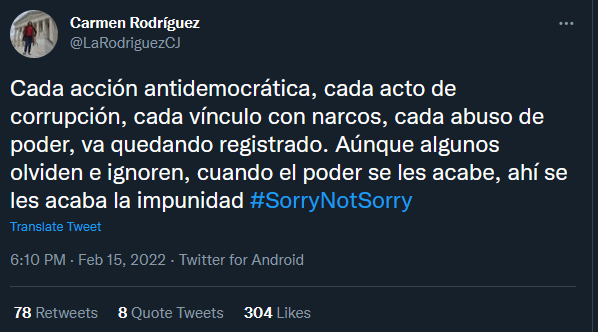

Notice how many times it's been retweeted...

In [61]:
S_word_sums = word_df_S.sum(axis=0)

S_word_sums[S_word_sums<71].sort_values(ascending=False).head(20)

people                49.0
ser                   47.0
get                   47.0
sorry                 44.0
i’m                   43.0
love                  41.0
gym                   38.0
aria                  37.0
nueva                 37.0
raza                  37.0
indígena              37.0
dont                  35.0
selfies               35.0
httpstcoi0itblyio5    35.0
say                   34.0
im                    33.0
si                    33.0
think                 32.0
don’t                 32.0
it’s                  30.0
dtype: float64

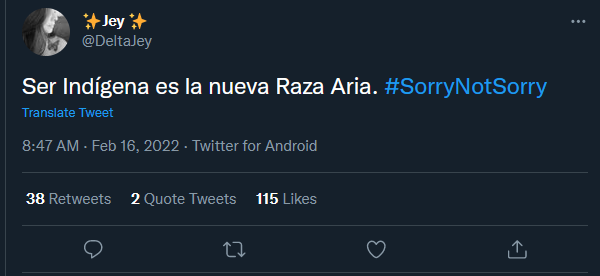

What is the problem here? How would we fix it?

In [62]:
df_S['text'].nunique(), len(df_S)

(957, 1308)

Alot of these tweets are just RTs...

Here's what happens if we don't count RTs.

In [63]:
unique_tweets = df_S['text_clean'].drop_duplicates()
unique_words = [x.split(" ") for x in unique_tweets]

unique_words = [list(set(x) - set(sw_list)) for x in unique_words]

series_list = [pd.Series(x).value_counts() for x in unique_words]
word_df_S_unique = pd.concat(series_list,axis=1).fillna(0).T

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_10328\184949714.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_list = [pd.Series(x).value_counts() for x in unique_words]


In [64]:
word_df_S_unique.sum().sort_values(ascending=False).head(20)

like      64.0
get       37.0
i’m       36.0
people    35.0
love      34.0
im        32.0
sorry     32.0
si        29.0
think     28.0
don’t     26.0
really    25.0
dont      24.0
good      24.0
it’s      23.0
go        22.0
much      21.0
one       21.0
say       21.0
see       19.0
shit      19.0
dtype: float64

With EconTwitter :

In [65]:
unique_tweets = df_E['text_clean'].drop_duplicates()
unique_words = [x.split(" ") for x in unique_tweets]

unique_words = [list(set(x) - set(sw_list)) for x in unique_words]

series_list = [pd.Series(x).value_counts() for x in unique_words]
word_df_E_unique = pd.concat(series_list,axis=1).fillna(0).T
word_df_E_unique.sum().sort_values(ascending=False).head(25)

econtwitter           529.0
economics              70.0
inflation              58.0
new                    58.0
wsj                    57.0
nytimes                54.0
bloomberg              54.0
antitrust              53.0
economic               52.0
cnbc                   52.0
wapo                   50.0
paper                  49.0
cnn                    48.0
bigtech                47.0
economy                47.0
research               41.0
latimes                41.0
us                     37.0
economists             29.0
httpstco3jzisqtt5h     27.0
big                    27.0
join                   23.0
great                  23.0
2022                   22.0
one                    22.0
dtype: float64